In [11]:
# 미션: 로또 번호 생성기
# 주제: 1부터 45까지의 숫자 중에서 랜덤으로 6개의 로또 번호를 생성하는 프로그램을 작성하세요.
# 요구사항: 6개의 숫자가 중복되지 않도록 랜덤으로 생성합니다.
import random
def lotto_number():
    number = list(range(1,46))
    lotto_number = random.sample(number, 6)
    return lotto_number
lotto_number2 = lotto_number()
print(lotto_number2)

[39, 31, 19, 14, 30, 12]


-자전거 대여수(저는 좀 부족해서 복습겸 다시했습니다.)


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [13]:
# csv파일 불러오기
bike_df = pd.read_csv('../data/bike_train.csv')
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [14]:
# 문자열을 datetime 타입으로 변경.
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

# 년,월,일,시간 표시.
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x : x.hour)
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [15]:
drop_columns = ['datetime','casual','registered'] # 딕셔너리로 필요없는 컬럼명 지우기.
bike_df.drop(drop_columns, axis=1,inplace=True)
bike_df.describe() #< 없었는지 확인.

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,191.574132,2011.501929,6.521495,9.992559,11.541613
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,181.144454,0.500019,3.444373,5.476608,6.915838
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,42.000000,2011.000000,4.000000,5.000000,6.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000,2012.000000,7.000000,10.000000,12.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,284.000000,2012.000000,10.000000,15.000000,18.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,977.000000,2012.000000,12.000000,19.000000,23.000000


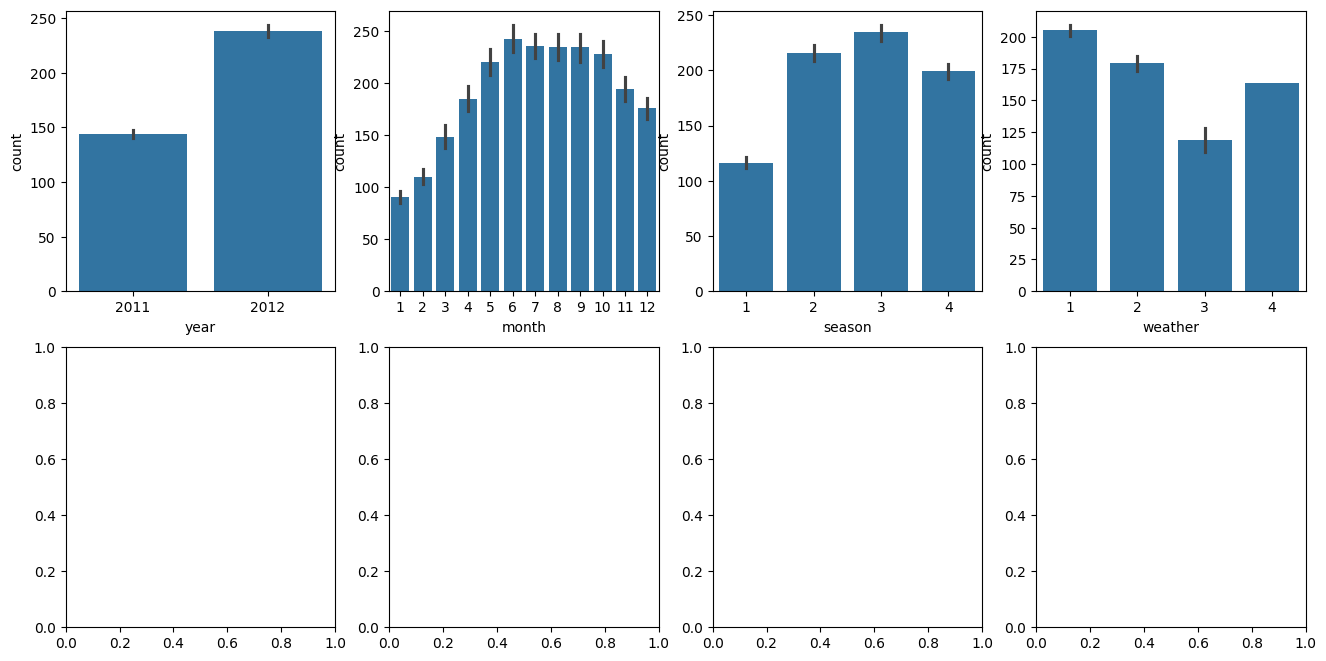

In [32]:
#막대그래프로 시각화하기
# 막대 그래프(년, 월, 시즌, 날씨)
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2) # 여기서꼭 2행 4열을 해야하는가? 2x2로하면 다보이지않음
cat_features = ['year', 'month','season','weather']
 
for i, feature in enumerate(cat_features):
    row = int(i/4)
    col = i%4
 
    sns.barplot(x=feature, y='count', data=bike_df, ax=axs[row][col])

<Axes: xlabel='workingday', ylabel='count'>

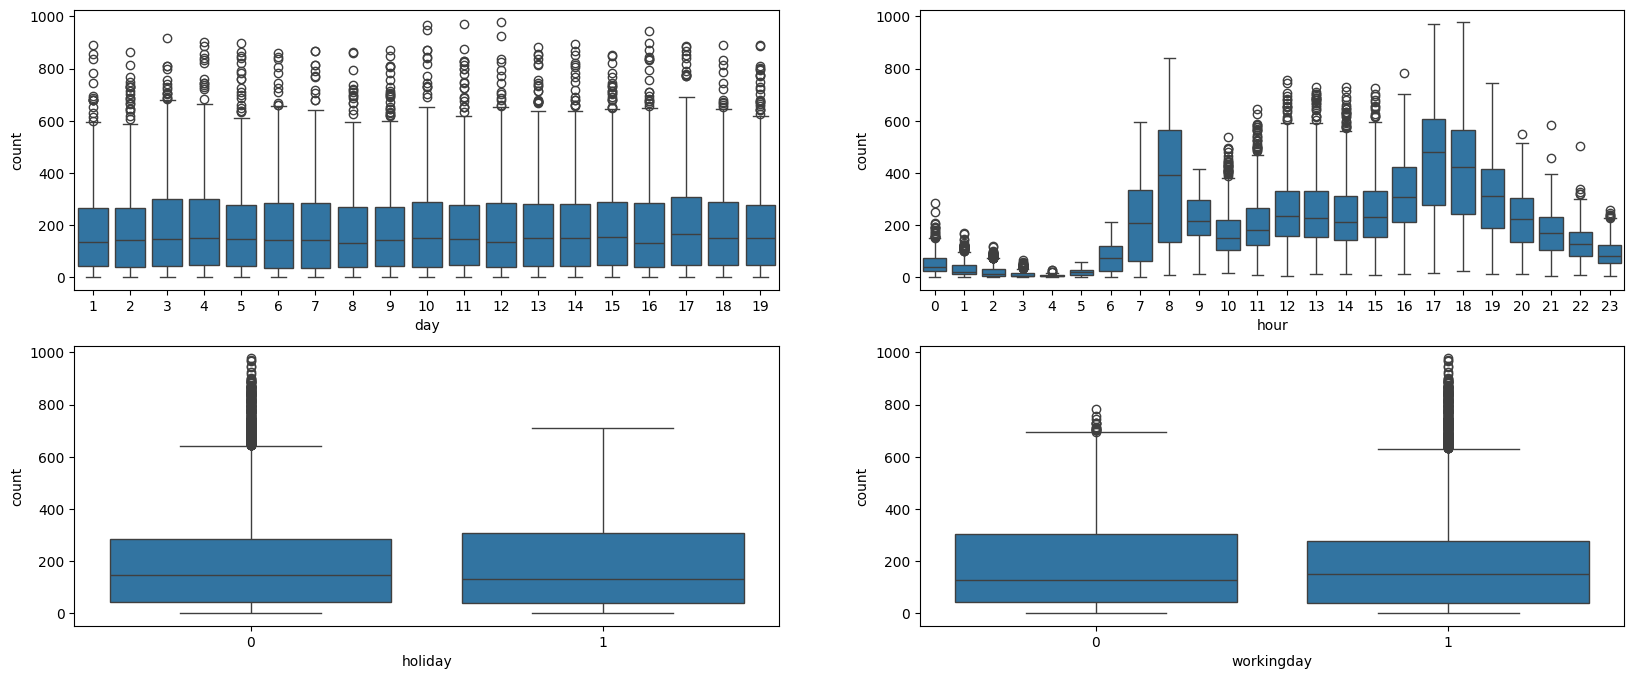

In [36]:
#박스플롯(일, 시간, 휴일, 근무일)
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(20,8)
 
sns.boxplot(data=bike_df, x="day", y="count", ax=axes[0][0])
sns.boxplot(data=bike_df, x="hour", y="count", ax=axes[0][1])
sns.boxplot(data=bike_df, x = 'holiday', orient="v", y="count", ax=axes[1][0])
sns.boxplot(data=bike_df, x="workingday", y="count", ax=axes[1][1])

In [38]:
# 성능평가함수 정의

from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

# MSE, RMSE, RMSLE 를 모두 계산
def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}'.format(rmsle_val, rmse_val, mae_val))

In [44]:
# 모델 평가하기

from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression , Ridge , Lasso

y_target = bike_df['count']
X_features = bike_df.drop(['count'],axis=1,inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.5, random_state=12) #1.3/0 이아닌 0.5/12로 한번 해보기.

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test ,pred)                         # 테스트 실제값, 테스트 예측값

RMSLE: 1.183, RMSE: 142.387, MAE: 106.135


In [49]:
def get_top_error_data(y_test, pred, n_tops = 5):
    # DataFrame에 컬럼들로 실제 대여횟수(count)와 예측 값을 서로 비교 할 수 있도록 생성.
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count']= np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    # 예측값과 실제값이 가장 큰 데이터 순으로 출력.
    print(result_df.sort_values('diff', ascending=False)[:n_tops])

# 만들어진 모델을 가지고 실제 대여횟수와 예측값을 비교
get_top_error_data(y_test,pred,n_tops=10)

      real_count  predicted_count   diff
1306         817            161.0  656.0
3184         839            200.0  639.0
557          835            210.0  625.0
1579         977            391.0  586.0
4574         731            147.0  584.0
3966         917            334.0  583.0
843          890            312.0  578.0
1589         888            320.0  568.0
4635         856            291.0  565.0
3851         884            320.0  564.0


<Axes: >

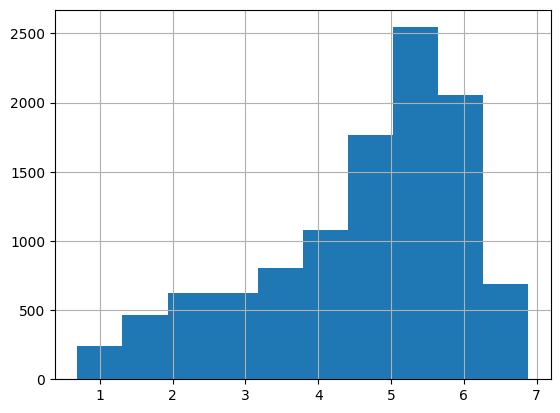

In [51]:
#타겟분포도 확인
y_log_transform=np.log1p(y_target)
y_log_transform.hist()

In [52]:
# 타깃 칼럼인 count 값을 log1p로 로그 변환한 후에 다시 평가 수행
y_target_log = np.log1p(y_target)

# 로그 변환된 y_target_log를 반영하여 학습/테스트 데이터 셋 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.5, random_state=12) #아까 0.5/12 로 계산
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# 테스트 데이터 셋의 Target 값은 Log 변환되었으므로 다시 expm1를 이용하여 원래 scale로 변환
y_test_exp = np.expm1(y_test)

# 예측 값 역시 Log 변환된 타깃 기반으로 학습되어 예측되었으므로 다시 exmpl으로 scale변환
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp ,pred_exp)

RMSLE: 1.019, RMSE: 160.456, MAE: 106.936


In [53]:
#RMSLE: 1.183, RMSE: 142.387, MAE: 106.135 
#RMSLE: 1.019, RMSE: 160.456, MAE: 106.936 

<Axes: ylabel='None'>

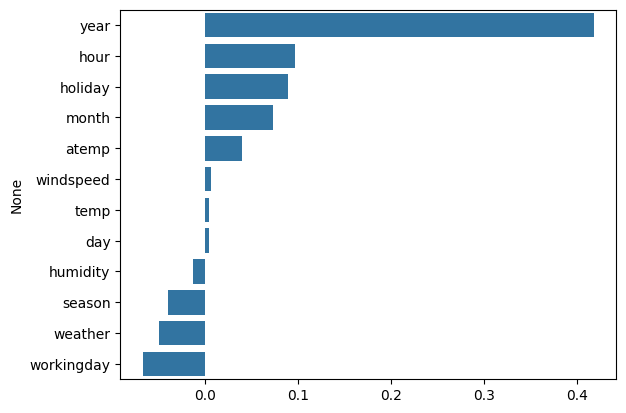

In [55]:
# 각 피처별 회귀계수 값 시각화
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [57]:
#원핫 인코딩 하기
X_features_ohe = pd.get_dummies(X_features, columns=['year','month','workingday','season','weather'])

In [59]:
# 원-핫 인코딩이 적용된 feature 데이터 세트 기반으로 학습/예측 데이터 분할.
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log,
                                                    test_size=0.5, random_state=12) #0.5/12

# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
    print('--------------------------------------')
# end of function get_model_predict

# model 별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)

### LinearRegression ###
RMSLE: 1.007, RMSE: 157.928, MAE: 104.007
--------------------------------------
### Ridge ###
RMSLE: 1.006, RMSE: 157.921, MAE: 104.033
--------------------------------------
### Lasso ###
RMSLE: 1.009, RMSE: 158.197, MAE: 104.794
--------------------------------------


<Axes: ylabel='None'>

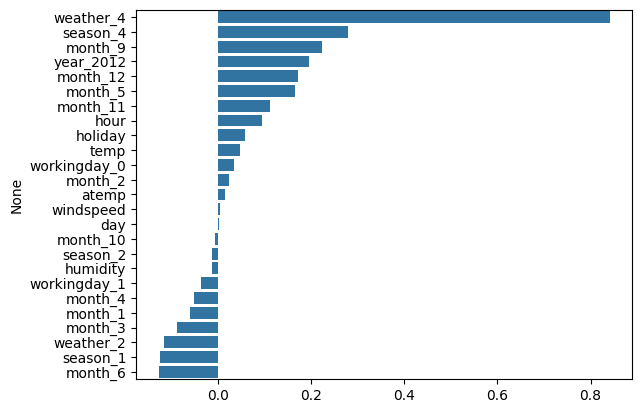

In [61]:
# 어떤 피처가 예측 결과에 큰 영향을 주는지 계수 값이 큰 피처 상위 25개를 선별하여 시각화
coef = pd.Series(lr_reg.coef_ , index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:25]
sns.barplot(x=coef_sort.values , y=coef_sort.index)

In [ ]:
# 아직 많이 부족해서 거의 따라하긴 했는데 0.3/0 값에서 0.5/12로 했는데 별 차이가 없었음